<a href="https://colab.research.google.com/github/soumya-1313/Clustering/blob/main/Copy_of_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***(a) Install Pycaret***

In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


# ***1. Clustering***

# ***1.1 Get the Wine-Quality dataset***

In [ ]:
import pandas as pd

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Drop the target column (since clustering is unsupervised)
# df.drop(columns='class', inplace=True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# ***1.2 Parameter Setting***

In [ ]:
from pycaret.clustering import *
clustering_Setup = setup(df, normalize=True)

,Description,Value
0,Session id,7691
1,Original data shape,"(1599, 12)"
2,Transformed data shape,"(1599, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


# ***1.3 Building "Kmeans" Clustering Model***

In [ ]:
kmeans_model = create_model('kmeans')
print(kmeans_model)
# print("For Cluster = 3")
# x = create_model('kmeans', num_clusters = 3)

# print("For Cluster = 4")
# x = create_model('kmeans', num_clusters = 4)

# print("For Cluster = 5")
# x = create_model('kmeans', num_clusters = 5)

# print("For Cluster = 6")
# x = create_model('kmeans', num_clusters = 6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1623,273.1273,1.7065,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=4, random_state=7691)


# ***1.4 Assign Model***

In [ ]:
kMeanPrediction = assign_model(kmeans_model)
kMeanPrediction

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Cluster 2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Cluster 2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Cluster 2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Cluster 1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Cluster 2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Cluster 3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Cluster 3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Cluster 2


# ***1.5 Evaluate Model***

In [ ]:
evaluate_model(kmeans_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# ***1.6 Plot for Clusters***

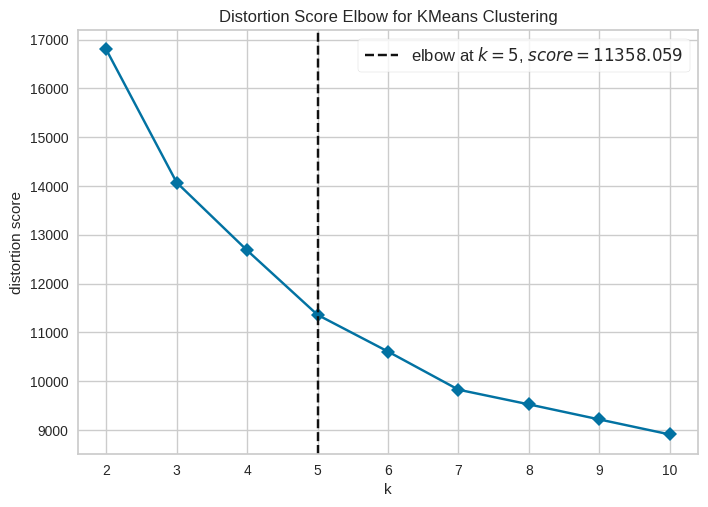

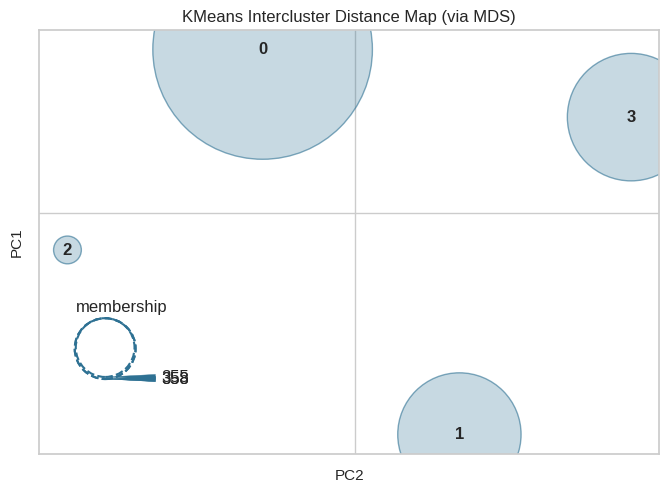

In [ ]:
# 2D
plot_model(kmeans_model,plot='cluster')
#Elbow plot
plot_model(kmeans_model,plot='elbow')
#silhouette plot
plot_model(kmeans_model, plot = 'distance')


# ***1.7 Make Predictions***

In [ ]:
feature_names = kmeans_model.feature_names_in_
print(feature_names)

newData = df.loc[:9, feature_names]
newData

# newPredictions = predict_model(kmeans_model, data=newData)
# newPredictions

['sepal_length' 'sepal_width' 'petal_length' 'petal_width']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# ***PARAMETERS***

# ***2. for Kmeans***

# ***2.1 "Data Preprocessing"***

In [ ]:
print("For Cluster = 3")
KMeanClusteringModel1 = create_model('kmeans', num_clusters=3)

print("For Cluster = 4")
KMeanClusteringModel2 = create_model('kmeans', num_clusters=4)

print("For Cluster = 5")
KMeanClusteringModel3 = create_model('kmeans', num_clusters=5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1730,292.9428,1.8460,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1623,273.1273,1.7065,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1778,274.5551,1.4988,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***2.2 Clustering Applying "Normalization"***

### **2.2.1 Preprocessing with min max scaling**

In [ ]:
setup(df,normalize=True,normalize_method='minmax')
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

,Description,Value
0,Session id,1097
1,Original data shape,"(1599, 12)"
2,Transformed data shape,"(1599, 12)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,minmax


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1887,375.2816,1.8049,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1856,353.1864,1.6285,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1796,325.6157,1.6278,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# **2.2.2 Preprocessing with PCA**

In [ ]:
setup(df, pca=True, pca_components=2, session_id=123)
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

,Description,Value
0,Session id,123
1,Original data shape,"(1599, 12)"
2,Transformed data shape,"(1599, 2)"
3,Numeric features,12
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,PCA,True
9,PCA method,linear


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5312,3142.1823,0.6503,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4952,3159.6281,0.7025,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4604,3179.3427,0.7235,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***2.3 Model performance using Transformation***

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2887,1382.2643,1.1686,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

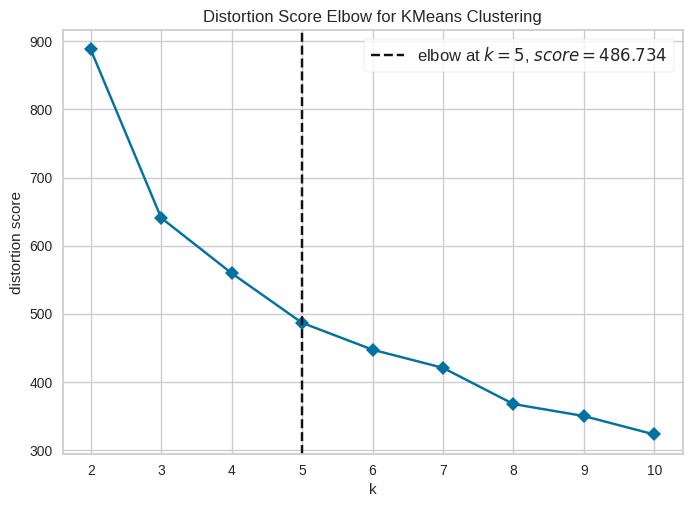

In [ ]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x,plot='elbow')


# ***2.3.1 Evaluation parameters***

In [ ]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3392,1710.5731,1.0169,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2670,1399.2680,1.2384,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2802,1250.0894,1.1157,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***2.4 performace using "PCA"***

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4879,3051.5263,0.7117,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

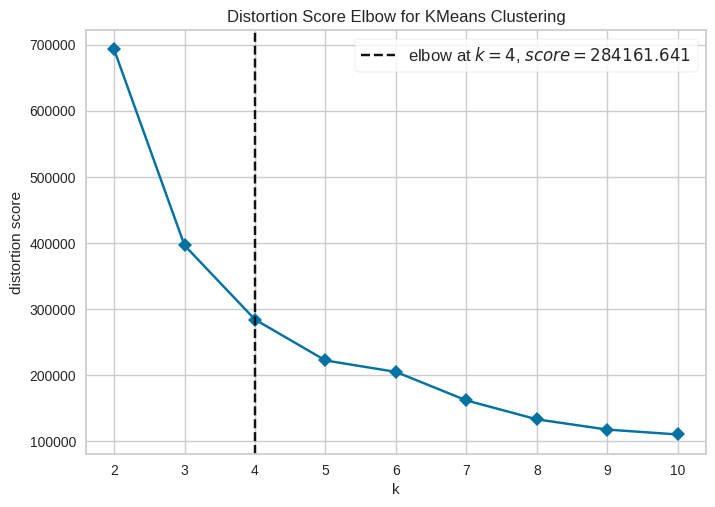

In [ ]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x,plot='elbow')

## ***2.4.1 Evaluation Parameters***

In [ ]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5184,3058.1746,0.6640,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4838,3051.5665,0.7150,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4384,3029.1494,0.7520,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***2.5 Model performance using "transformation"+"normalization"***

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1471,278.7801,1.8160,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

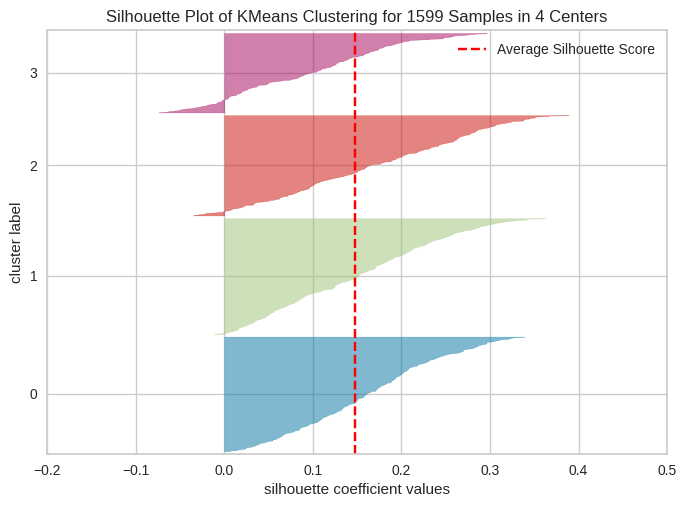

In [ ]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x,plot='silhouette')

## ***2.5.1 Evaluation Parameters***

In [ ]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'maxabs', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2894,817.3965,1.2233,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2356,700.5866,1.3931,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2258,617.5399,1.3582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***2.6 Model Performance using "Transformation" + "Normalization" + "PCA"***

In [ ]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'robust', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1329,260.8742,1.9847,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***2.6.1 Evaluation Parameters***

In [ ]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1602,289.6911,1.7976,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1481,278.8926,1.7990,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1441,253.9380,1.8611,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***3. for Hierarchical Clustering***

# ***3.1 Data preprocessing***

In [ ]:
print("For Cluster = 3")
HierarchicalClusteringModel1 = create_model('hclust', num_clusters=3)

print("For Cluster = 4")
HierarchicalClusteringModel2 = create_model('hclust', num_clusters=4)

print("For Cluster = 5")
HierarchicalClusteringModel3  = create_model('hclust', num_clusters=5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1247,250.2404,1.9943,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1142,228.2218,2.0340,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1129,209.8825,2.0554,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1142,228.2218,2.0340,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

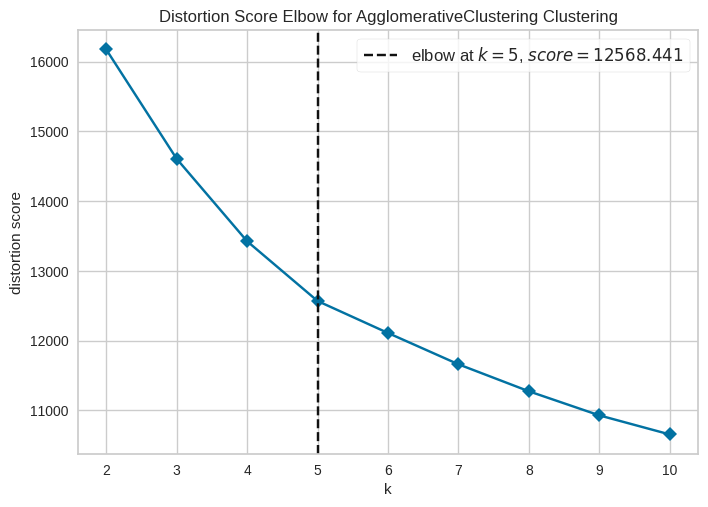

In [ ]:
x = create_model('hclust')
plot_model(x, plot = 'elbow')

# ***3.2 Normalization***

In [ ]:
setup(data = df, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1430,228.3249,1.9956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1475,216.7685,1.6172,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1296,216.5409,1.7311,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1475,216.7685,1.6172,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

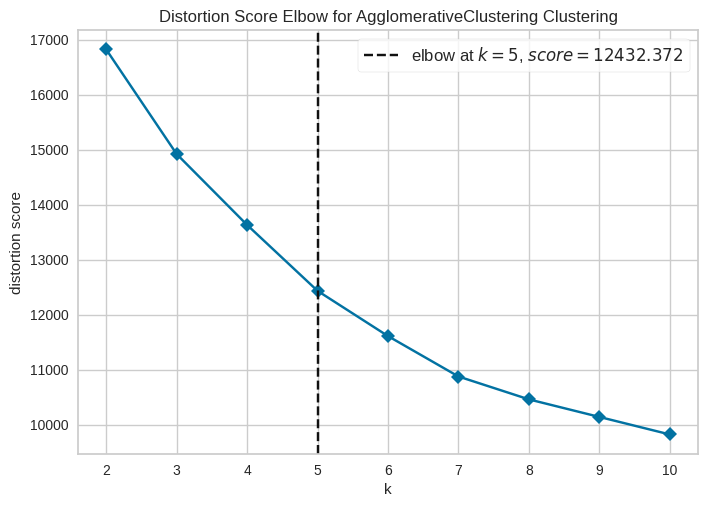

In [ ]:
setup(data = df, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

# ***3.3 Transformation***

In [ ]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3131,1598.6195,1.0565,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2693,1230.0147,1.1450,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2141,1072.1545,1.3181,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2693,1230.0147,1.1450,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

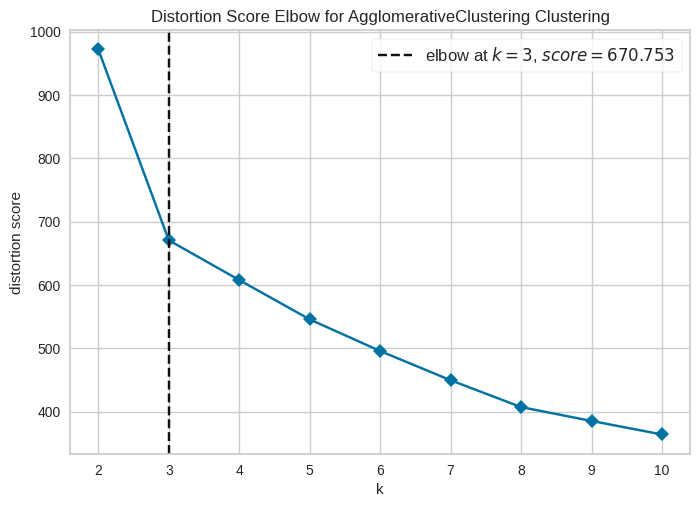

In [ ]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

# ***3.4 Using PCA***

In [ ]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4589,2430.6559,0.7343,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3856,2338.6915,0.7524,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3996,2770.6072,0.7506,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3856,2338.6915,0.7524,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

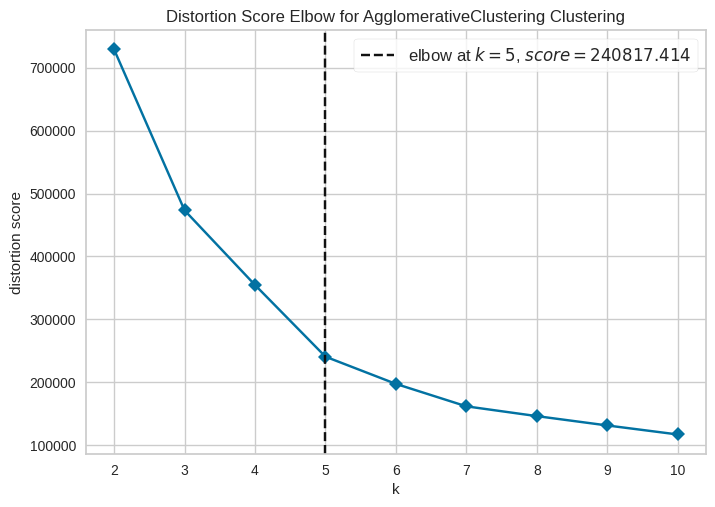

In [ ]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

# ***3.5 Transformation + Normalization***

In [ ]:
setup(data =df ,transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1247,250.2404,1.9943,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1142,228.2218,2.0340,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1129,209.8824,2.0554,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1142,228.2218,2.0340,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

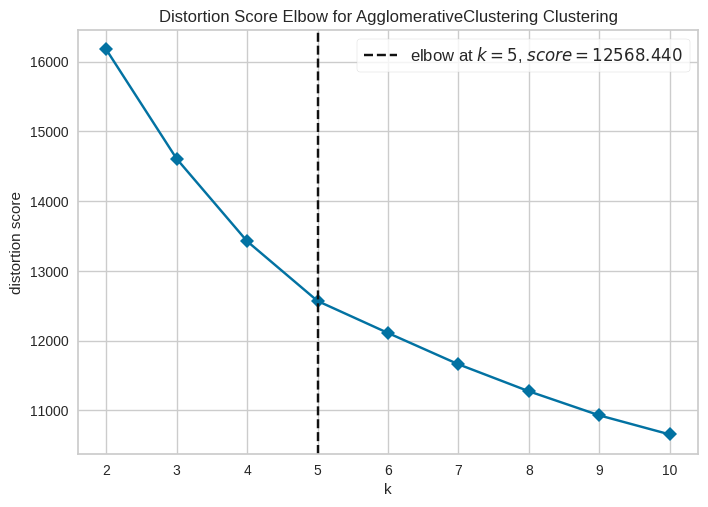

In [ ]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

# ***3.6 Transformation+Normalization+PCA***

In [ ]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1247,250.2404,1.9943,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1142,228.2218,2.0340,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1129,209.8825,2.0554,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1142,228.2218,2.0340,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

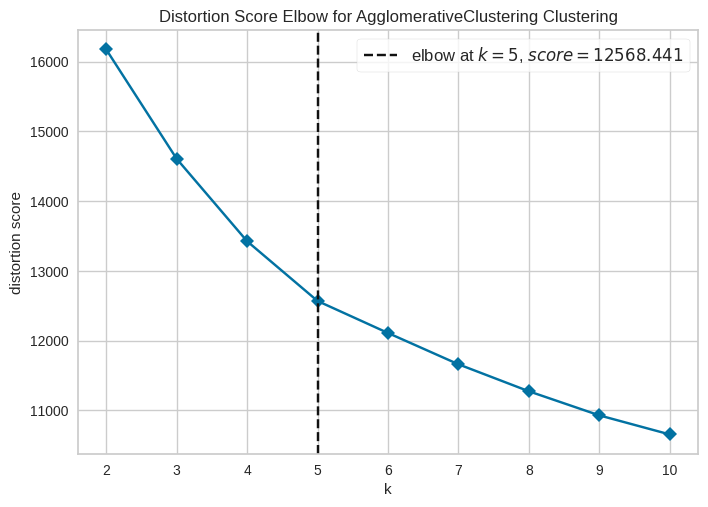

In [ ]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

# ***4. For K-Mean shift Clustering***

# ***4.1 Data Preprocessing***

In [ ]:
print("For Cluster = 3")
kmeanshiftModel1 = create_model('meanshift', num_clusters=3)

print("For Cluster = 4")
kmeanshiftModel2 = create_model('meanshift', num_clusters=4)

print("For Cluster = 5")
kmeanshiftModel3 = create_model('meanshift', num_clusters=5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
x = create_model('meanshift')
plot_model(x)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***4.2 Normalization***

In [ ]:
setup(data = df, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3145,35.4606,0.9525,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3145,35.4606,0.9525,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3145,35.4606,0.9525,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3145,35.4606,0.9525,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

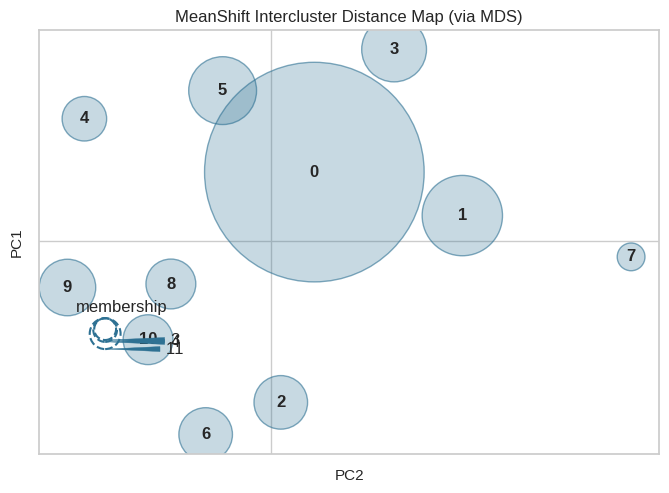

In [ ]:
setup(data = df, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('meanshift')
plot_model(x, plot = 'distance')

# ***4.3 Transformation***

In [ ]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
setup(data = df, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('meanshift')
plot_model(x)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***4.4 PCA***

In [ ]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5959,719.2127,0.3712,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5959,719.2127,0.3712,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5959,719.2127,0.3712,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
setup(data = df, pca = True, pca_method = 'linear', verbose=False)
x = create_model('meanshift')
plot_model(x)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5959,719.2127,0.3712,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***4.5 Transformation+Normalization***

In [ ]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
setup(data = df, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('meanshift')
plot_model(x)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# ***4.6 Transformation+Normalization+PCA***

In [ ]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('meanshift', num_clusters = 3)

print("For Cluster = 4")
x = create_model('meanshift', num_clusters = 4)

print("For Cluster = 5")
x = create_model('meanshift', num_clusters = 5)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
setup(data = df, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('meanshift')
plot_model(x)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4035,14.6834,0.9004,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]